# Micro-Credit Defaulter Model

# Introduction:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

# Problem Statement:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

### Importing the required libraries:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

Loading the dataset:

In [2]:
df = pd.read_csv('Data file.csv')

# looking for the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# Dropping the Unnamed:0 column as it is not contributing to our dataset

df = df.drop('Unnamed: 0', axis =1)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
# Checking for the columns of the dataset:

df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Column Description:
1. 'label':
Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

2. 'msisdn':
mobile number of user

3. 'aon':
age on cellular network in days

4. 'daily_decr30':
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

5. 'daily_decr90':
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

6. 'rental30':
Average main account balance over last 30 days

7. 'rental90':
Average main account balance over last 90 days

8. 'last_rech_date_ma':
Number of days till last recharge of main account

9. 'last_rech_date_da':
Number of days till last recharge of data account

10. 'last_rech_amt_ma':
Amount of last recharge of main account (in Indonesian Rupiah)

11. 'cnt_ma_rech30':
Number of times main account got recharged in last 30 days

12. 'fr_ma_rech30':
Frequency of main account recharged in last 30 days

13. 'sumamnt_ma_rech30':
Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

14. 'medianamnt_ma_rech30':
Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

15. 'medianmarechprebal30':
Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

16. 'cnt_ma_rech90':
Number of times main account got recharged in last 90 days

17. 'fr_ma_rech90':
Frequency of main account recharged in last 90 days

18. 'sumamnt_ma_rech90':
Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

19. 'medianamnt_ma_rech90':
Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

20. 'medianmarechprebal90':
Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

21. 'cnt_da_rech30':
Number of times data account got recharged in last 30 days

22. 'fr_da_rech30':
Frequency of data account recharged in last 30 days

23. 'cnt_da_rech90':
Number of times data account got recharged in last 90 days

24. 'fr_da_rech90':
Frequency of data account recharged in last 90 days

25. 'cnt_loans30':
Number of loans taken by user in last 30 days

26. 'amnt_loans30':
Total amount of loans taken by user in last 30 days

27. 'maxamnt_loans30':
maximum amount of loan taken by the user in last 30 days

28. 'medianamnt_loans30':
Median of amounts of loan taken by the user in last 30 days

29. 'cnt_loans90':
Number of loans taken by user in last 90 days

30. 'amnt_loans90':
Total amount of loans taken by user in last 90 days

31. 'maxamnt_loans90':
maximum amount of loan taken by the user in last 90 days

32. 'medianamnt_loans90':
Median of amounts of loan taken by the user in last 90 days

33. 'payback30':
Average payback time in days over last 30 days

34. 'payback90':
Average payback time in days over last 90 days

35. 'pcircle':
telecom circle

36. 'pdate':
date

In [5]:
# Dropping the 'msisdn' as this will not contribute in model building

df = df.drop(['msisdn'], axis=1)

In [6]:
# Checking the shape of the dataset:

df.shape

(209593, 35)

The dataset contains 209593 rows and 36 columns including the target column.
'label' is the target column.

In [7]:
# Checking for the null/missing values in the dataset

df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is no missing values in the dataset.

In [8]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

The dataset contains 21 float datatype, 12 integer datatype, and 3 object datatype columns.
There are 35 feature columns and 1 target column in the dataset.

In [9]:
# Splitting the pdate ccolumn into 'Day', 'Month', and 'Year' for better analysis

df['pdate'] = pd.to_datetime(df['pdate'])
df['Year'] = df['pdate'].dt.year
df['Month'] = df['pdate'].dt.month
df["Day"] = df["pdate"].dt.day

In [10]:
# Dropping the pdate column as we've splitted the day, month, and year

df = df.drop('pdate', axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016,6,22


In [11]:
# Dropping the pcircle column as it only contain single value.

df = df.drop('pcircle', axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22


In [12]:
# Dropping the Year column as it only contain 2016 as values.

df = df.drop('Year', axis=1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [13]:
# Checking for the datatype of the columns again:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [14]:
# Checking for the value counts of the target column.
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

There are total 183431 results for the label '1' and 26162 results for the label '0'

<AxesSubplot:ylabel='label'>

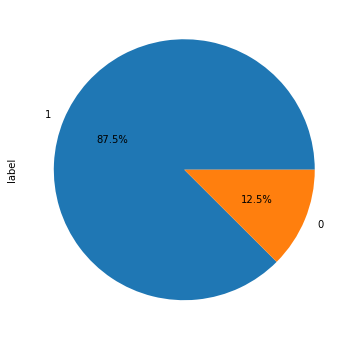

In [15]:
# Plotting pie plot to show the distribution of the target column

plt.figure(figsize=[6,6])
df['label'].value_counts().plot.pie(autopct='%0.1f%%')

The above two observations shows that the data is imbalance.
We'll work on this in further steps.

# Data Visualization:

<Figure size 576x432 with 0 Axes>

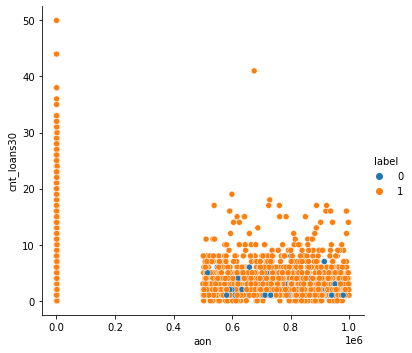

In [16]:
# Plotting graph to show the relation between 'aon' (age on cellular network in days) and 'label' (target column).

plt.figure(figsize=[8,6])
sns.relplot(x='aon',y='cnt_loans30',  hue='label', data=df)

<Figure size 720x432 with 0 Axes>

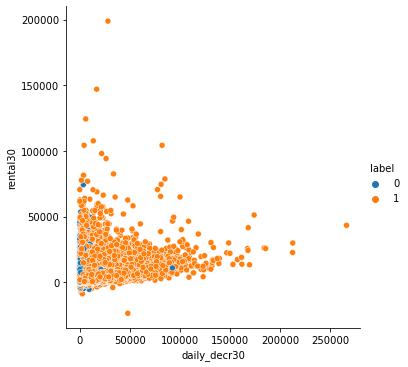

In [17]:
plt.figure(figsize=[10,6])
sns.relplot(x='daily_decr30', y='rental30', hue='label', data=df)

<Figure size 720x432 with 0 Axes>

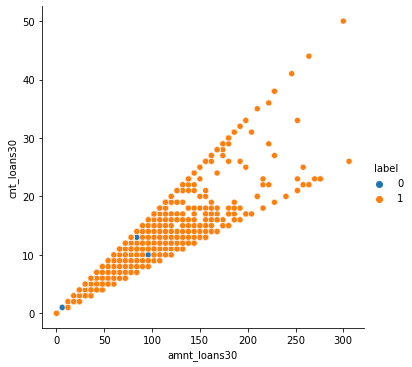

In [18]:
plt.figure(figsize=[10,6])
sns.relplot(x='amnt_loans30',y="cnt_loans30",hue="label",data=df)

<Figure size 720x432 with 0 Axes>

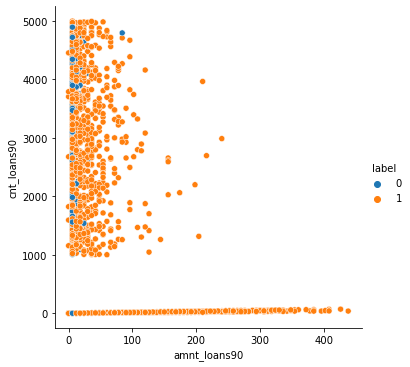

In [19]:
plt.figure(figsize=[10,6])
sns.relplot(x='amnt_loans90',y="cnt_loans90",hue="label",data=df)

We found that the number of defaulters are more for 90 days but the loan amount is below 100.

<Figure size 720x432 with 0 Axes>

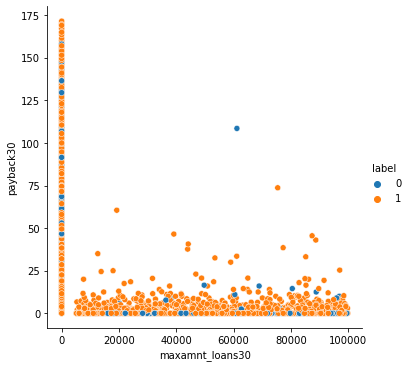

In [23]:
plt.figure(figsize=[10,6])
sns.relplot(x='maxamnt_loans30',y="payback30",hue="label",data=df)

<Figure size 720x432 with 0 Axes>

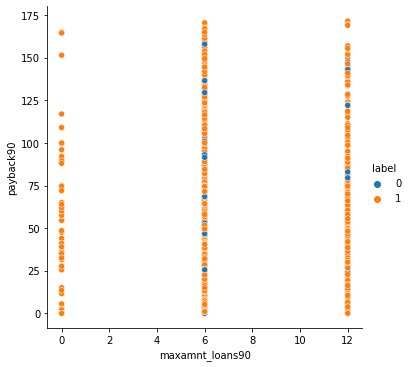

In [24]:
plt.figure(figsize=[10,6])
sns.relplot(x='maxamnt_loans90',y="payback90",hue="label",data=df)

We can say that as the number of days of payback is incrrasing the number of defaulters are also increasing.

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>],
       [<AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'mediana

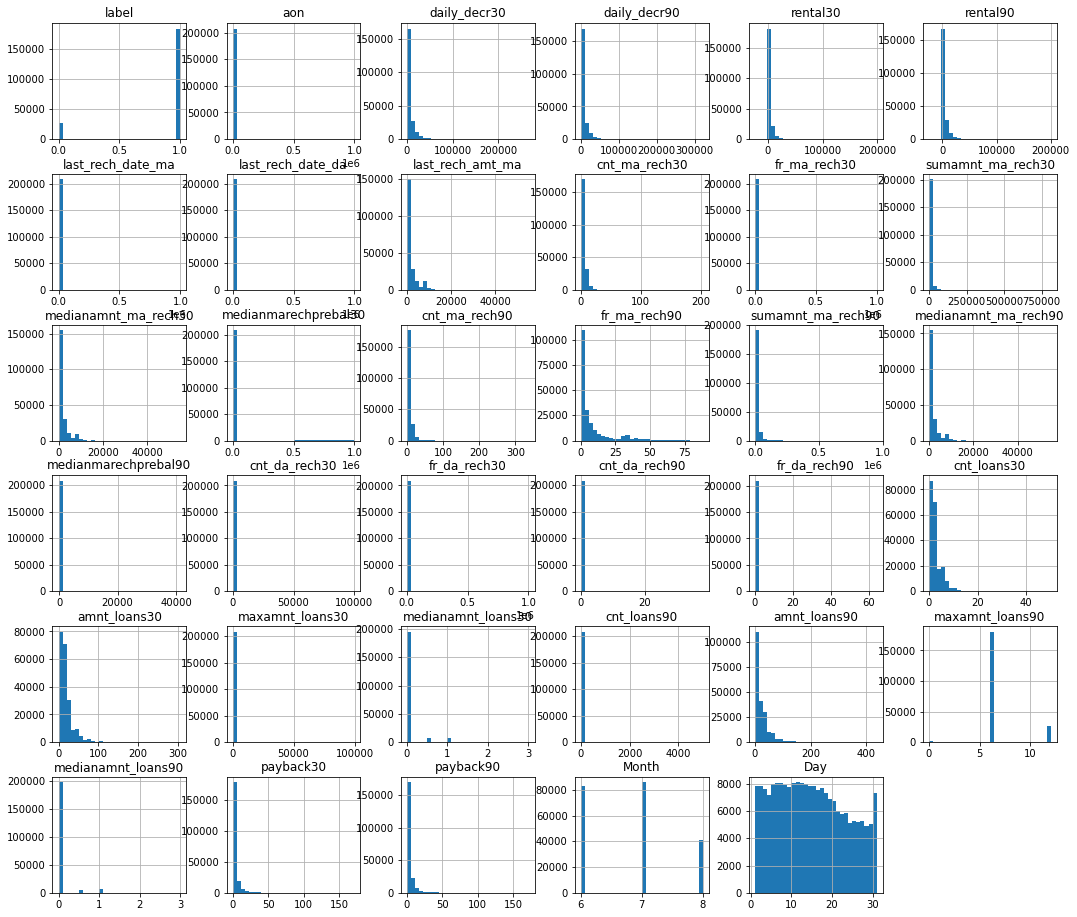

In [25]:
# Plotting the histogram for univariant analysis to check the normal distribution
df.hist(figsize=[18,16], grid=True, layout=(6,6), bins=30)

# Statistical Summary:

In [26]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


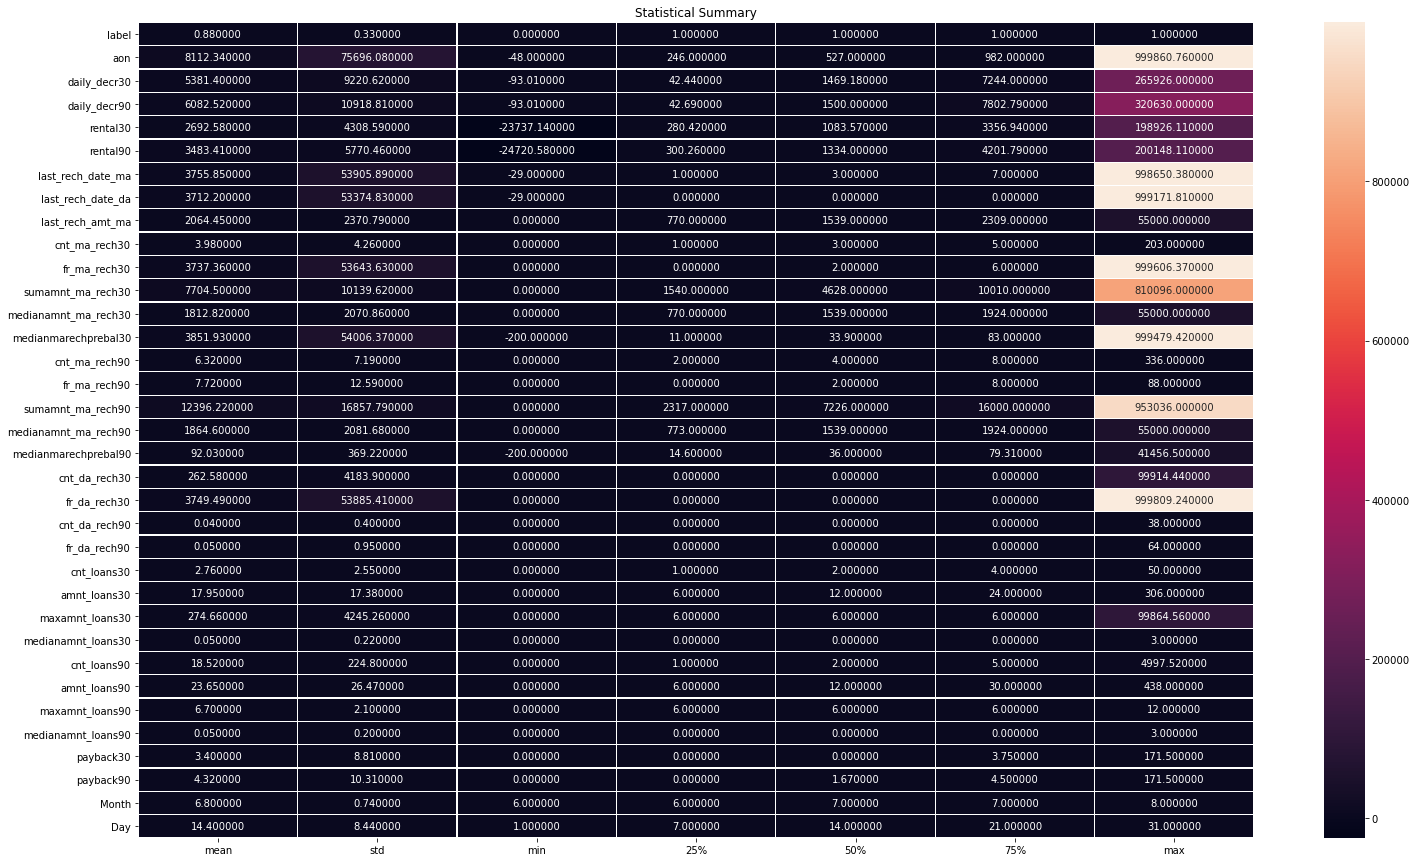

In [27]:
# PLotting heatmap for the statistical summary

plt.figure(figsize=[25,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

# Correlation:

In [28]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


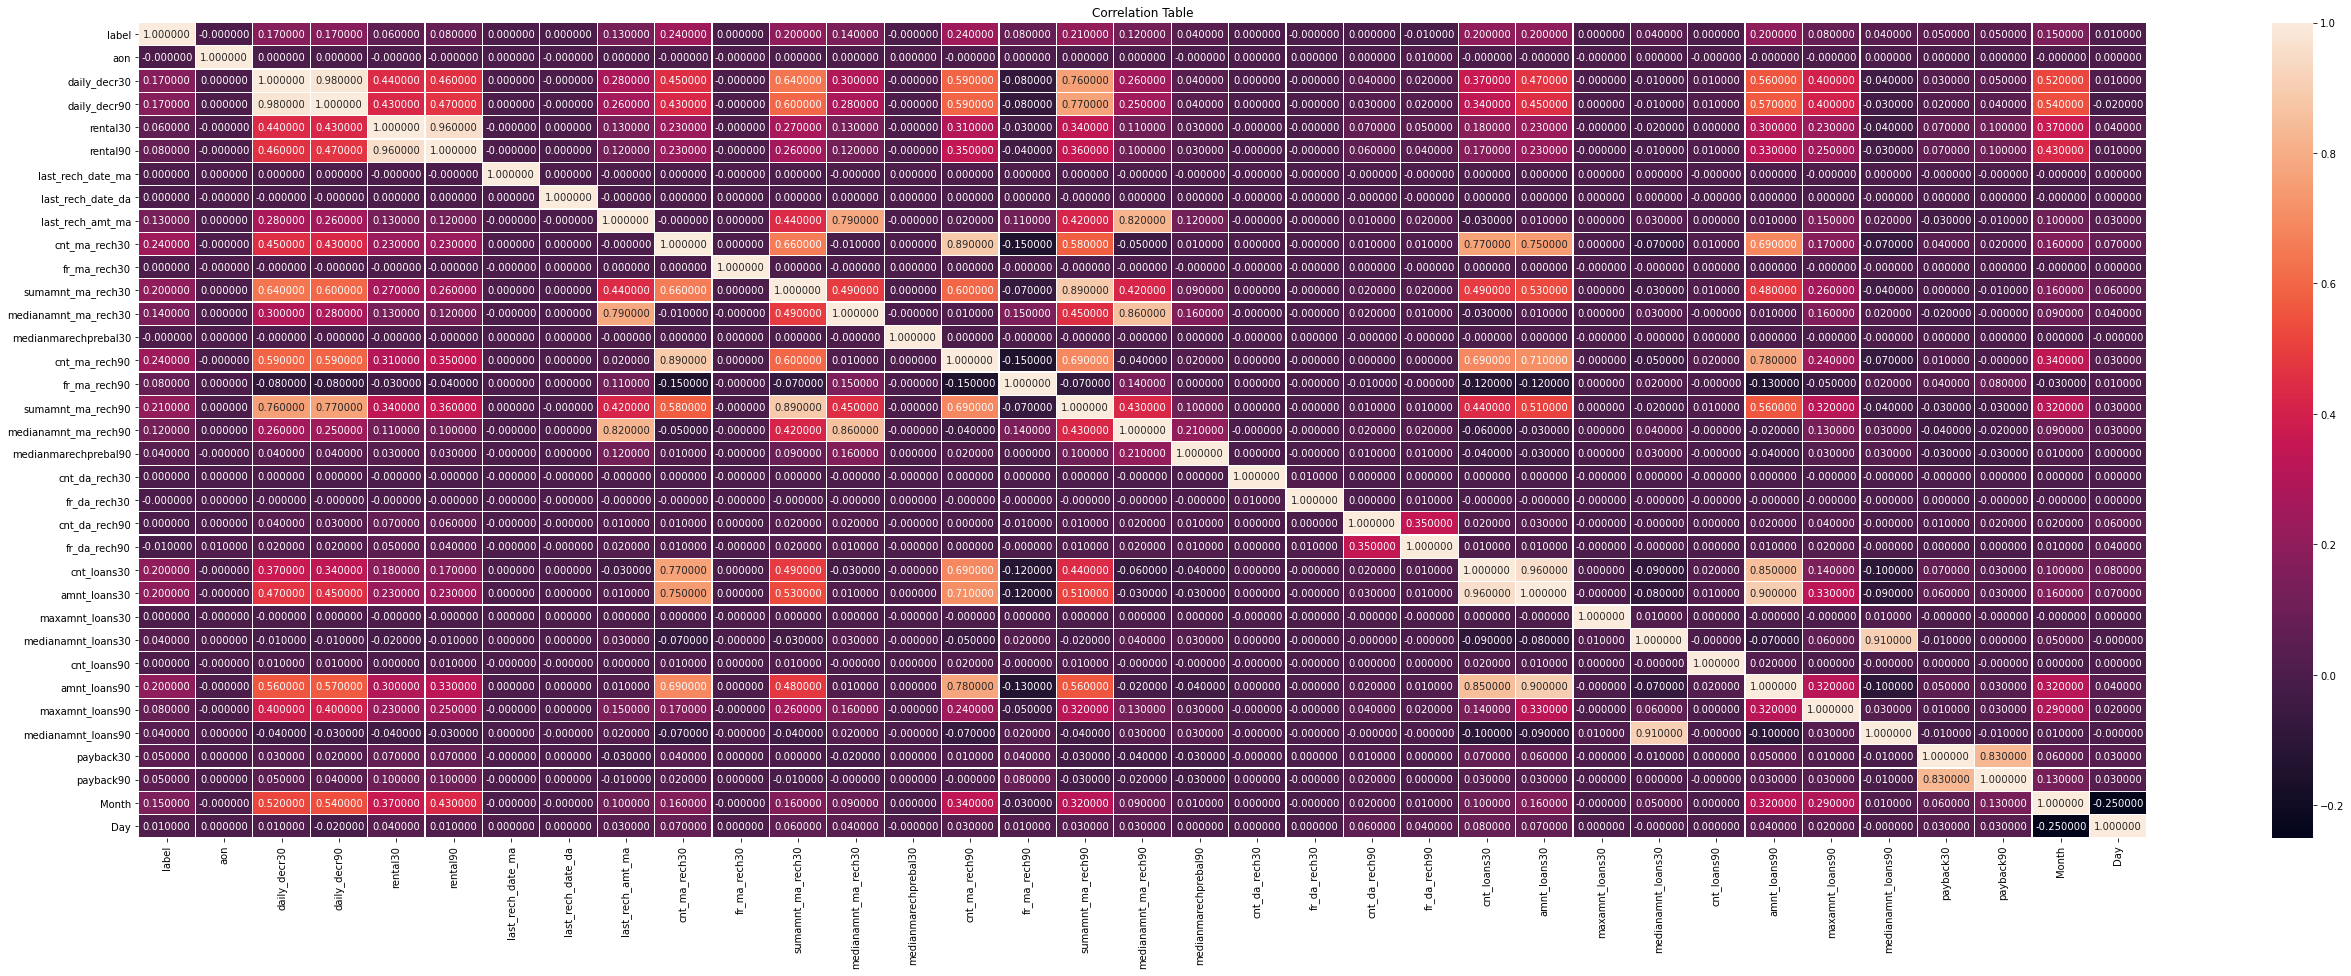

In [29]:
# PLotting heatmap for the correlation table

plt.figure(figsize=[45,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

cnt_ma_rech30 & cnt_ma_rech90 have the maximum correlation with the target column. It have 24% correlation which can be considered as strong bond.

sumamnt_ma_rech90 have 21% correlation with the target column which can be considered as strong bond.

sumamnt_ma_rech30, cnt_loans30, amnt_loans30, and amnt_loans90 columns are showing 20% correlation with the target column which can be considered as good bond.

Checking for the outliers:

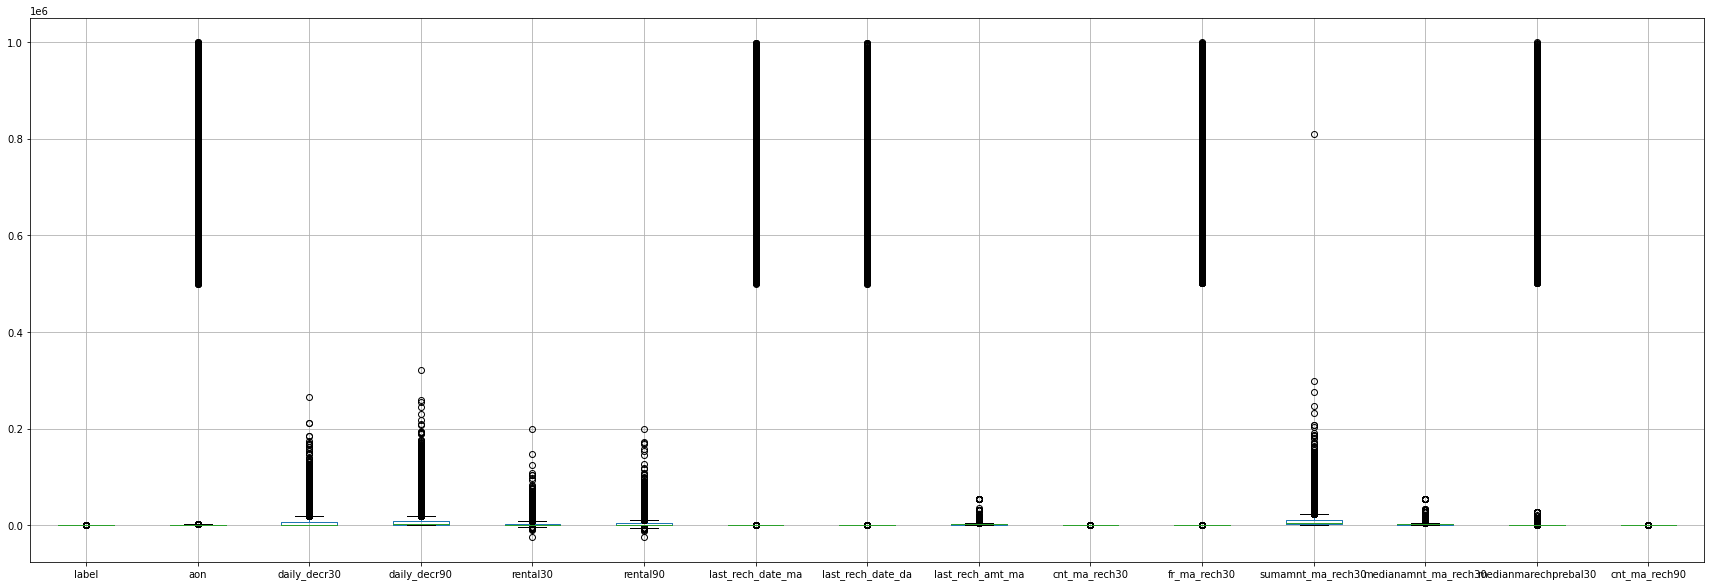

In [30]:
# Checking outliers for the first 15 columns

df.iloc[:,0:15].boxplot(figsize=[30,12])
plt.subplots_adjust(bottom=0.25)
plt.show()

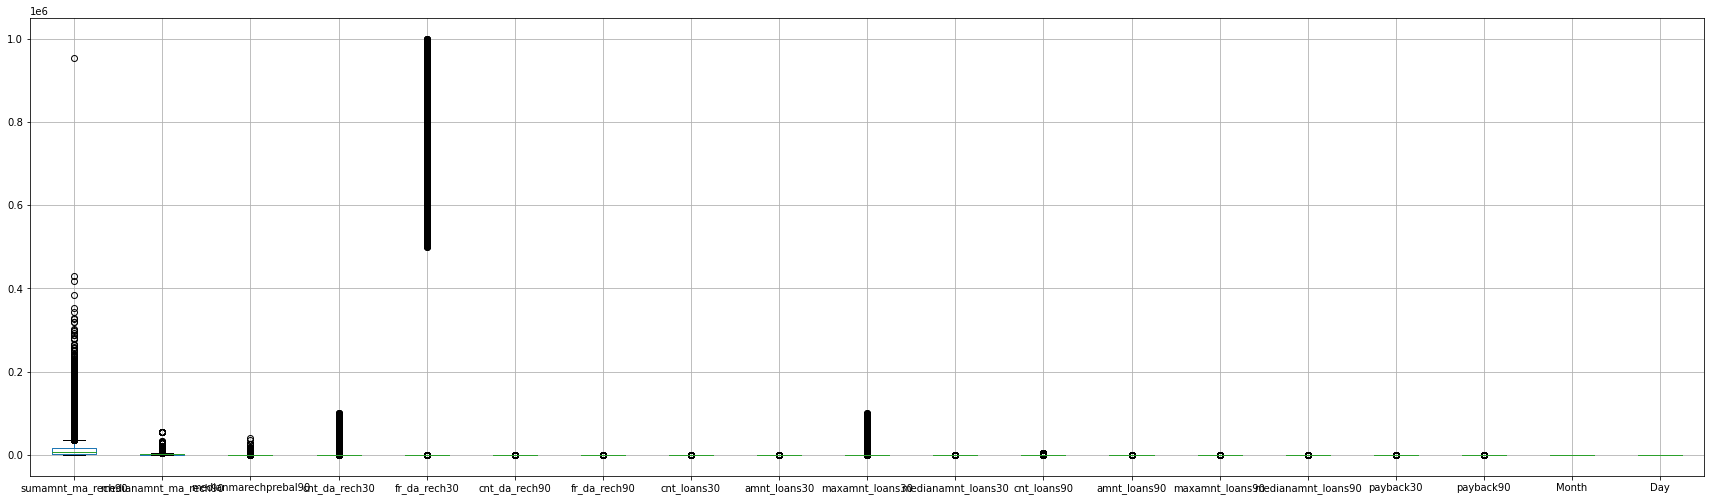

In [31]:
# Checking outliers for the remaining columns

df.iloc[:,16:35].boxplot(figsize=[30,12])
plt.subplots_adjust(bottom=0.35)
plt.show()

outliers are present in almost all the columns of the dataset.

#Removing the outliers:

In [32]:
# Using z-score technique

from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(209593, 35)

In [33]:
thresholds = 3
print(np.where(z>6))

(array([    30,     53,     65, ..., 209531, 209533, 209576], dtype=int64), array([6, 6, 1, ..., 7, 6, 1], dtype=int64))


In [35]:
# Checking the difference between the original data and after removing the outliers.

df_new = df[(z<6).all(axis=1)]
print('The shape of the original data ',df.shape)
print('The shape of the data after removing the outliers ',df_new.shape)

The shape of the original data  (209593, 35)
The shape of the data after removing the outliers  (193906, 35)


In [36]:
# Splitting the dataset into independent and dependent variables

x = df_new.drop(['label'], axis =1)
y = df_new['label']

In [37]:
# Checking for the skewness in the independent variables:

x.skew()

aon                      0.947867
daily_decr30             2.453814
daily_decr90             2.595149
rental30                 2.631426
rental90                 2.759309
last_rech_date_ma        3.107505
last_rech_date_da        9.967871
last_rech_amt_ma         2.248388
cnt_ma_rech30            1.829448
fr_ma_rech30             2.015434
sumamnt_ma_rech30        2.280079
medianamnt_ma_rech30     2.455330
medianmarechprebal30    10.838530
cnt_ma_rech90            1.989332
fr_ma_rech90             2.259902
sumamnt_ma_rech90        2.354024
medianamnt_ma_rech90     2.467533
medianmarechprebal90     5.479082
cnt_da_rech30           34.810210
fr_da_rech30            88.493646
cnt_da_rech90            7.424236
fr_da_rech90            68.985611
cnt_loans30              2.061551
amnt_loans30             2.093557
maxamnt_loans30         36.620491
medianamnt_loans30       4.082281
cnt_loans90             44.705457
amnt_loans90             2.333483
maxamnt_loans90          1.733874
medianamnt_loa

The skewness table is showing that the dataset is highly skewed.

# Removing the skewness:

In [38]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new, columns = x.columns)

### Standard Scaler:

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_new)
x

array([[-0.7245837 ,  0.4320914 ,  0.40238783, ...,  1.83139877,
         0.42251222,  0.71610495],
       [ 0.24944094,  1.15856486,  1.09780044, ..., -1.0096299 ,
         1.48940062, -0.40281699],
       [-0.10820981,  0.09595218,  0.07645479, ..., -1.0096299 ,
         1.48940062,  0.61559739],
       ...,
       [ 0.79699249,  1.14468004,  1.08733922, ...,  0.77592724,
         0.42251222,  1.54821526],
       [ 1.92420009,  1.17640869,  1.11866737, ...,  1.37247479,
         0.42251222,  1.192685  ],
       [ 1.70265588,  0.61654001,  0.58317473, ..., -1.0096299 ,
         0.42251222, -0.81248855]])

### Handling data imbalance by oversampling:

In [40]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [41]:
#Checking the value count of the target column after oversampling

y_over.value_counts()

0    169493
1    169493
Name: label, dtype: int64

### Finding best RandomState:

In [42]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7803622525738222  on Random_State  161


Data Preproccessing:

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.20, random_state=104)

## Model Training:

1. LogisticRegression:

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test, predlr))

0.7777958051859937
[[26687  6954]
 [ 8111 26046]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     33641
           1       0.79      0.76      0.78     34157

    accuracy                           0.78     67798
   macro avg       0.78      0.78      0.78     67798
weighted avg       0.78      0.78      0.78     67798



We're getting 78% accuracy score using LogisticRegression.

2. RidgeClassifier

In [45]:
from sklearn.linear_model import RidgeClassifier

RC = RidgeClassifier()
RC.fit(x_train,y_train)
pred_rc = RC.predict(x_test)

print(accuracy_score(y_test, pred_rc))
print(confusion_matrix(y_test, pred_rc))
print(classification_report(y_test, pred_rc))

0.7749786129384347
[[26186  7455]
 [ 7801 26356]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     33641
           1       0.78      0.77      0.78     34157

    accuracy                           0.77     67798
   macro avg       0.77      0.78      0.77     67798
weighted avg       0.78      0.77      0.77     67798



We're getting 78% accuracy score from RidgeClassifier.

3. RandomForestClassifier:

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))
0.9534647039735685

0.9536859494380365
[[32247  1394]
 [ 1746 32411]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     33641
           1       0.96      0.95      0.95     34157

    accuracy                           0.95     67798
   macro avg       0.95      0.95      0.95     67798
weighted avg       0.95      0.95      0.95     67798



0.9534647039735685

We're getting 95% accuracy score from RandomForestClassifier.

4. DecisionTreeClassifier:

In [47]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.9119148057464822
[[30853  2788]
 [ 3184 30973]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     33641
           1       0.92      0.91      0.91     34157

    accuracy                           0.91     67798
   macro avg       0.91      0.91      0.91     67798
weighted avg       0.91      0.91      0.91     67798



We're getting 91% accuracy score using DecisionTreeClassifier.

We're getting highest accuracy score from RandomForestClassifier. Let's check for the cross validation score to decide the best fit model.

Cross validation score:

In [48]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=3)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.8846709287365497


In [49]:
# Checking for the cross validation score of the RidgeClassifier.

scr = cross_val_score(RC, x,y, cv=3)
print('Cross Validation Score for the RidgeClassifier is ', scr.mean())

Cross Validation Score for the RidgeClassifier is  0.8747021761784032


In [50]:
#Checking cross validation score of RandomForest Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(RF,x,y,cv=3)
print('Cross validation score for RandomForestClassifier is ',scr.mean())

Cross validation score for RandomForestClassifier is  0.9206780607386871


In [51]:
#Checking cross validation score of DecisionTree Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(DT,x,y,cv=3)
print('Cross validation score for DecisionTree Classifier is ',scr.mean())

Cross validation score for DecisionTree Classifier is  0.8832011420941361


As checked we're getting minimum difference between accuracy score and cross validation score for DecisionTree (3.01). So, the best fit model is DecisionTree.
DecisionTreeClassifier is the best model.

Hyper Parameter Tuning:

In [52]:
from sklearn.model_selection import GridSearchCV

#KNN
params = {'criterion':['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_leaf':[5,10,20.50,100]}

GCV = GridSearchCV(estimator=DT,param_grid= params, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [53]:
GCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10, 20.5, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [54]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 10, 'splitter': 'best'}

In [55]:
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, splitter = 'best')
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9133307767190773
[[30938  2703]
 [ 3173 30984]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     33641
           1       0.92      0.91      0.91     34157

    accuracy                           0.91     67798
   macro avg       0.91      0.91      0.91     67798
weighted avg       0.91      0.91      0.91     67798



After hyper parameter tuning we're getting 91% accuracy score.

## AUC ROC Curve:

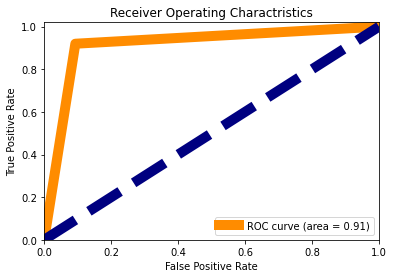

In [56]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()


Saving the model:

In [58]:
import pickle
filename = 'micro_credit_project.pkl'
pickle.dump(model, open(filename, 'wb'))